No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de regressão, classificação e regressão logística.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em python puro, Numpy, Keras e Tensorflow
- Utilizar o perceptron para regressão e classificação

# Sumário

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten

%matplotlib inline

Using TensorFlow backend.


# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. O Perceptron nada mais é que um  classificador/regressor linear responsável por mapear uma ou mais entradas em uma saída desejada. Além disso, o método de aprendizagem do Perceptron é adaptativo, ou seja, os melhores parâmetros são aprendidos utilizando algum método de minimização conhecido. Em geral, esse método é o _Gradiente Descendente_, mas outros métodos de minimização podem ser utilizados.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1 ... x_D$: representam os atributos dos seus dados com dimensionalidade D. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1 ... w_D)$. Em geral, também é alimentada por um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{w_ix_i} + b$$

- __função de ativação__ $f$: inicialmente, o perceptron foi projetado para utilizar a função de ativação linear, ou seja, o resultado da junção aditiva representava a saída do Perceptron.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$y_{pred} = f(\sum_i^D{w_ix_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x$: representa os atributos dos nossos dados que servem de entrada para o Perceptron.
- $w$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: função de ativação.
- $y_{pred}$: representa a saída do Perceptron (o valor predito).


## Como o Perceptron Aprende?

Se você já leu sobre o Perceptron antes, você provavelmente já viu que o modo como o perceptron aprende - isto é, a forma como os pesos são atualizados -, dá-se pela seguite fórmula:

$$w_i = w_i + \lambda(y_i - y_{pred})x_i$$

Onde $\lambda$ é a __taxa de aprendizagem__.

Mas você já imaginou da onde vem essa fórmula? Em primeiro lugar, o método de atulização dos pesos é baseado no __Gradiente Descendente__. Sendo $\overrightarrow{w} = \{w_1, w_2, ..., w_D\}$, a atualização dos pesos é dados por:

$$\overrightarrow{w} = \overrightarrow{w} + \Delta{\overrightarrow{w}}$$

em que:

$$\Delta{\overrightarrow{w}} = \lambda\nabla E(\overrightarrow{w})$$

Sendo $\nabla E(\overrightarrow{w})$ o gradiente de uma função que depende de $\overrightarrow{w}$ e que queremos minimizar.

Agora, imagine que estamos utilizando um Perceptron para regressão, cuja função de custo geralmente é:

$$J(w) = \frac{1}{2}\sum_{i}^N (y_i - y_{pred_i})^2$$

Onde $N$ é a quantidade de amostras nos dados, e as demais variáveis representam as mesmas vistas anteriormente. Repare que a função de custo é quase uma _Mean Squared Error (MSE)_, só que ao invés de dividir por $N$, está se dividindo por 2 o resultado do somatório. O por quê disso será entendido mais a frente na demonstração.

Queremos encontrar o vetor $\overrightarrow{w}$ que minimiza a função $J$. Assim, temos:

$$\frac{\partial J}{\partial w_i} = \frac{\partial}{\partial w_i}\frac{1}{2}\sum_i^N (y_i - y_{pred_i})^2$$

Como a derivada do somatório é igual ao somatório das derivadas:

$$= \frac{1}{2}\sum_i^N \frac{\partial}{\partial w_i}(y_i - y_{pred_i})^2$$

Aplicando a regra da cadeia:

$$= \sum_i^N (y_i - y_{pred_i})\frac{\partial}{\partial w_i}(y_i - y_{pred_i})$$

Repare que, quando derivamos $(y_i - y_{pred_i})^2$, o expoente 2, ao sair do somatório, foi multiplicado por $\frac{1}{2}$, tornando-o 1. Isso é o que os matemáticos denominam de "conveniência matemática". 

Como $y_{pred_i} = w_i*x_i + b$ é uma função que depende de $w$, e sua derivada em relação a $w_i$ é apenas $x_i$, temos que:

$$\frac{\partial J}{\partial w_i} = \sum_i^N (y_i - y_{pred_i})(-x_i)$$
$$\frac{\partial J}{\partial w_i} = -\sum_i^N (y_i - y_{pred_i})x_i$$

Na forma vetorizada, essa equação torna-se:

$$\frac{\partial J}{\partial \overrightarrow{w}} = -(\overrightarrow{y} - \overrightarrow{y}_{pred})\overrightarrow{x}$$

Como o gradiente nos dá a direção que a função cresce, e queremos minimizar a função, podemos remover o sinal de menos em frente ao resultado. Logo, chegamos que a atualização dos pesos pelo perceptron é dada por $w_i = w_i + \lambda(y_i - y_{pred})x_i$.

# Regressão 

In [2]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


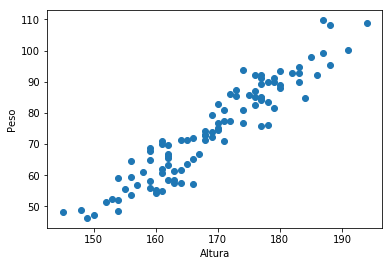

In [3]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [4]:
print(x.shape, y.shape)

(100,) (100,)


In [5]:
x = x.reshape(-1, 1)

print(x.shape)

(100, 1)


## Python

__Exercício__: tentar estimar as learning_rates de __w__ e __b__. Elas são diferentes por que nossos dados não estão na mesma escala!

In [6]:
from random import random

D = x.shape[1]
w = 2*random() - 1 # [1, 1]
b = 2*random() - 1 # [1, 1]

for step in range(10000):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = w*x_i + b
        error = y_i - y_pred
        w = w + 1e-7*error*x_i
        b = b + 1e-2*error
        sum_error += error
        
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print(w, b)

step 0: [ 4394.82509891]
step 1000: [-7.98977015]
step 2000: [-3.35286654]
step 3000: [-1.40701345]
step 4000: [-0.59044606]
step 5000: [-0.2477777]
step 6000: [-0.10397865]
step 7000: [-0.04363412]
step 8000: [-0.01831084]
step 9000: [-0.00768405]
[ 1.36976658] [-157.87590789]


## Numpy 

### Versão não-vetorizada

In [7]:
D = x.shape[1]
w = 2*np.random.random((1, D)) - 1 # [1, 1]
b = 2*np.random.random() - 1       # [1, 1]

for step in range(10000):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        # y_pred = w*x_i + b
        # y_pred = np.dot(w, x_i) + b
        y_pred = np.dot(w, x_i.T) + b # [1,1] x [1,1] + [1,1] = [1,1]
        error = y_i - y_pred
        w = w + 1e-7*error*x_i
        b = b + 1e-2*error
        sum_error += error
        
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print(w, b)

step 0: [ 12490.5281522]
step 1000: [-12.01982349]
step 2000: [-5.044058]
step 3000: [-2.11671337]
step 4000: [-0.88826803]
step 5000: [-0.37275718]
step 6000: [-0.15642566]
step 7000: [-0.06564324]
step 8000: [-0.02754685]
step 9000: [-0.0115599]
[[ 1.3696544]] [-157.85716899]


### Versão vetorizada

In [8]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1, 1]
b = 2*np.random.random()-1       # [1, 1]

for step in range(10000):
    y_pred = np.dot(w, x.T) + b # [1,1]x[1,100] + [1,1] = [1,100]
    error = y - y_pred # [1,100] + [100] = [1,100]
    w = w + 1e-7*np.dot(error, x) # [1,1] + [1,100]x[100,1] = [1,1]
    b = b + 1e-2*np.sum(error)
    
    if step%1000 == 0:
        print('step {0}: {1:.5f}'.format(step, np.sum(error)))
    
print(w, b)

step 0: 4357.77158
step 1000: -6.99365
step 2000: -2.92017
step 3000: -1.21931
step 4000: -0.50912
step 5000: -0.21258
step 6000: -0.08876
step 7000: -0.03706
step 8000: -0.01548
step 9000: -0.00646
[[ 1.3713131]] -157.441273367


### Versão vetorizada com pré-processamento

In [9]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
x_scale = minmax.fit_transform(x.astype(np.float64))

In [10]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1, 1]
b = 2*np.random.random()-1       # [1, 1]

learning_rate = 1e-3

for step in range(5000):
    y_pred = np.dot(w, x_scale.T) + b # [1,1]x[1,100] + [1,1] = [1,100]
    error = y - y_pred # [1,100] + [100] = [1,100]
    w = w + learning_rate*np.dot(error, x_scale) # [1,1] + [1,100]x[100,1] = [1,1]
    b = b + learning_rate*np.sum(error)
    
    if step%1000 == 0:
        print('step {0}: {1:.5f}'.format(step, np.sum(error)))
    
print(w, b)

step 0: 7361.06145
step 1000: -1.65280
step 2000: -0.03887
step 3000: -0.00091
step 4000: -0.00002
[[ 67.20329507]] 41.3947153375


## Keras 

In [11]:
D = x_scale.shape[1]

tf.reset_default_graph()
model = Sequential()
model.add(Dense(units=1, activation='linear', input_shape=(D,)))
model.compile(loss='mse', optimizer='sgd')

model.fit(x_scale, y, batch_size=x_scale.shape[0], epochs=5000, verbose=0)
error = model.evaluate(x_scale, y, batch_size=x_scale.shape[0], verbose=0)
w, b = model.get_weights()
print(error)
print(w,b)

26.1159591675
[[ 66.36580658]] [ 41.82068634]


## TensorFlow 

In [12]:
D = x_scale.shape[1]

tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    tf_x = tf.constant(x_scale)
    tf_y = tf.constant(y.reshape(1,-1))
    
    tf_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    tf_b = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(tf_w, tf.transpose(tf_x)), tf_b)
    error = tf.subtract(tf_y, y_pred)
    loss = tf.reduce_mean(tf.square(error))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(loss)

In [13]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(5000):
        _, error = sess.run([optimizer, loss], feed_dict={tf_x:x_scale, tf_y:y.reshape(1,-1)})

        if step%1000 == 0:
            print('step {0}: {1}'.format(step, error))
    
    print(error)
    print(tf_w.eval(), tf_b.eval())

step 0: 5551.060918211068
step 1000: 39.97749330185879
step 2000: 29.190119553682862
step 3000: 26.777769899016686
step 4000: 26.238303019290534
26.1177156634
[[ 66.34448384]] [[ 41.83153253]]


# Regressão Logística

# Classificação